#### PROBLEM STATEMENT 
Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC.
You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train= pd.read_csv('train_bikes.csv', parse_dates=['datetime'])
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [7]:
train.tail()

datetime  season  holiday  workingday  weather   temp  \
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

In [9]:
train.shape

(10886, 12)

In [11]:
train.info()# this means the data is cleaned.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [13]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

<Axes: xlabel='season', ylabel='count'>

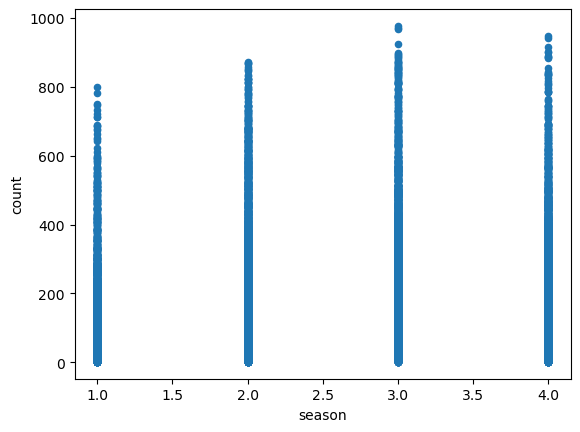

In [15]:
#scatter plot
train.plot.scatter(x='season',y="count")

<Axes: xlabel='holiday', ylabel='count'>

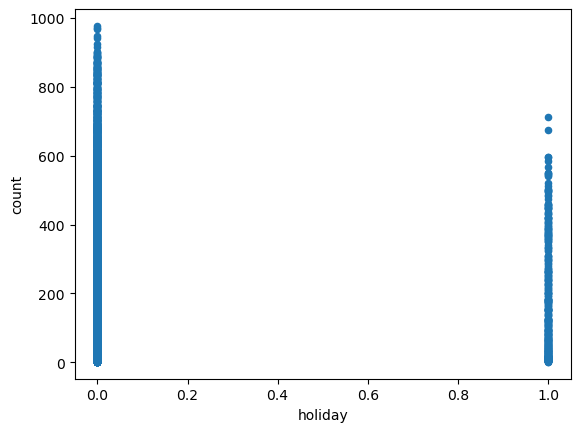

In [17]:
train.plot.scatter(x='holiday',y="count")

<Axes: xlabel='workingday', ylabel='count'>

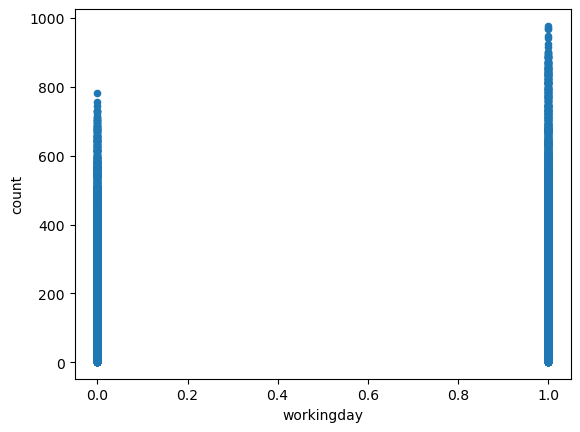

In [19]:
train.plot.scatter(x='workingday',y="count")

<Axes: xlabel='weather', ylabel='count'>

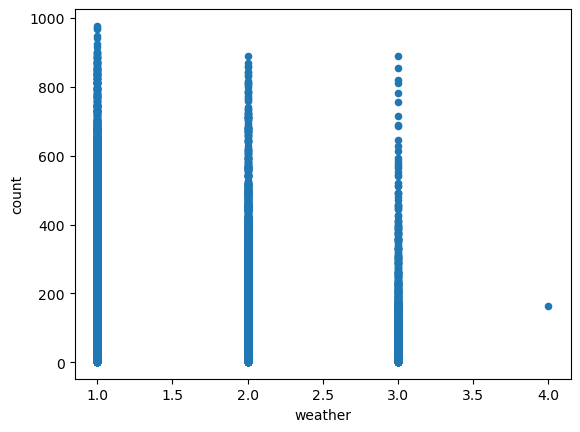

In [21]:
train.plot.scatter(x='weather',y="count")

<Axes: xlabel='temp', ylabel='count'>

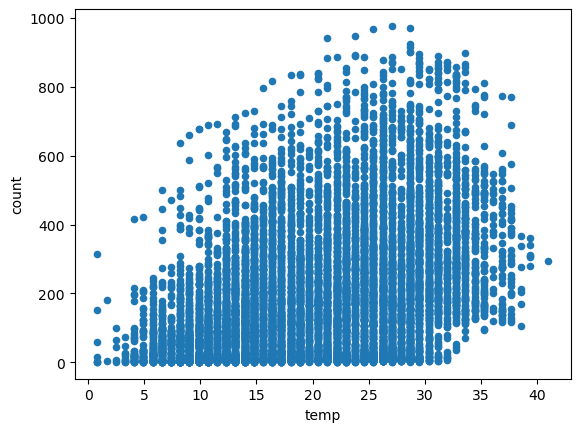

In [23]:
train.plot.scatter(x='temp',y="count")

<Axes: xlabel='atemp', ylabel='count'>

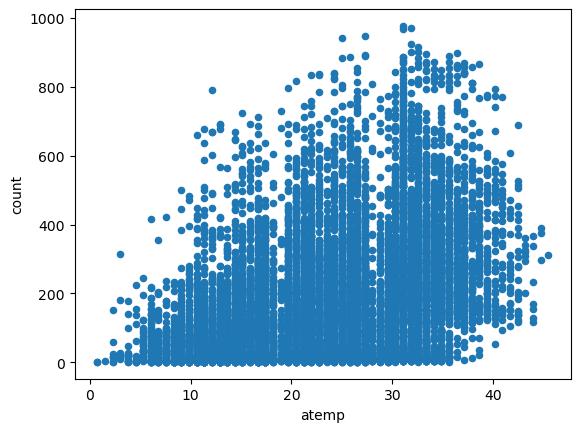

In [25]:
train.plot.scatter(x='atemp',y="count")

<Axes: xlabel='humidity', ylabel='count'>

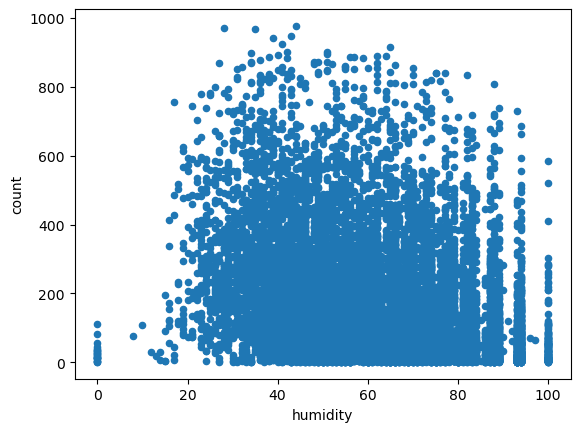

In [27]:
train.plot.scatter(x='humidity',y="count")

<Axes: xlabel='windspeed', ylabel='count'>

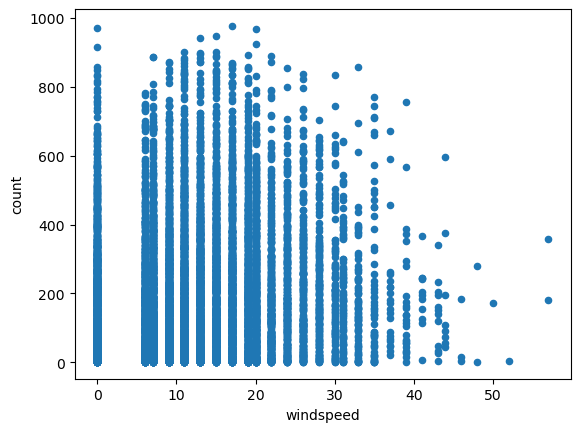

In [29]:
train.plot.scatter(x='windspeed',y="count")

<Axes: xlabel='casual', ylabel='count'>

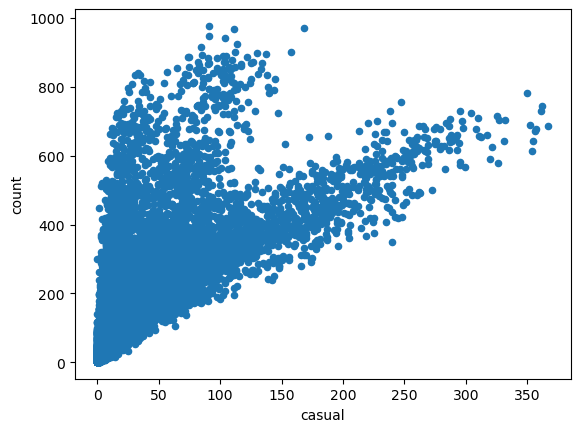

In [31]:
train.plot.scatter(x='casual',y="count")

In [33]:
train.describe()

datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968      2.506614      0.028569   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-02 07:15:00      2.000000      0.000000   
50%              2012-01-01 20:30:00      3.000000      0.000000   
75%              2012-07-01 12:45:00      4.000000      0.000000   
max              2012-12-19 23:00:00      4.000000      1.000000   
std                              NaN      1.116174      0.166599   

         workingday       weather         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.680875      1.418427     20.23086     23.655084     61.886460   
min        0.000000      1.000000      0.82000      0.760000      0.000000   
25%        0.000000      1.000000     13.94000     16.665000     47.000000   
50%        1.000000      1.000000     20.50000     24.240000     62.000000   
75%        1.000000      2.000000     26.24000     31.060000     77.000000   
max        1.000000      4.000000     41.00000     45.455000    100.000000   
std        0.466159      0.633839      7.79159      8.474601     19.245033   

          windspeed        casual    registered         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      12.799395     36.021955    155.552177    191.574132  
min        0.000000      0.000000      0.000000      1.000000  
25%        7.001500      4.000000     36.000000     42.000000  
50%       12.998000     17.000000    118.000000    145.000000  
75%       16.997900     49.000000    222.000000    284.000000  
max       56.996900    367.000000    886.000000    977.000000  
std        8.164537     49.960477    151.039033    181.144454

In [35]:
test=pd.read_csv('test_bikes.csv')

In [37]:
test.head()


datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [39]:
test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [41]:
test.describe()

season      holiday   workingday      weather         temp  \
count  6493.000000  6493.000000  6493.000000  6493.000000  6493.000000   
mean      2.493300     0.029108     0.685815     1.436778    20.620607   
std       1.091258     0.168123     0.464226     0.648390     8.059583   
min       1.000000     0.000000     0.000000     1.000000     0.820000   
25%       2.000000     0.000000     0.000000     1.000000    13.940000   
50%       3.000000     0.000000     1.000000     1.000000    21.320000   
75%       3.000000     0.000000     1.000000     2.000000    27.060000   
max       4.000000     1.000000     1.000000     4.000000    40.180000   

             atemp     humidity    windspeed  
count  6493.000000  6493.000000  6493.000000  
mean     24.012865    64.125212    12.631157  
std       8.782741    19.293391     8.250151  
min       0.000000    16.000000     0.000000  
25%      16.665000    49.000000     7.001500  
50%      25.000000    65.000000    11.001400  
75%      31.060000    81.000000    16.997900  
max      50.000000   100.000000    55.998600

In [43]:
import ydata_profiling

In [44]:
train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
print("count sample & feature",train.shape)

count sample & feature (10886, 12)


In [46]:
print("Are there missing values:" , train.isnull().values.any())

Are there missing values: False


#### Method for creating the count plot based on hours for a given year

In [48]:
def plot_by_year(data,year=None,agg='sum'):
    dd=data
    if year:
        dd =dd[dd.datetime.dt.year == year]
        dd.loc[:,('hour')] = dd.datetime.dt.hour
        by_hour = dd.groupby(['hour','workingday'])['count'].agg(agg).unstack()
    return by_hour.plot(kind='bar',ylim=(0,80000),figsize=(15,5),width=0.9,title='year = {0}'.format(year))

C:\Users\win10\AppData\Local\Temp\ipykernel_17356\95681878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd.loc[:,('hour')] = dd.datetime.dt.hour
C:\Users\win10\AppData\Local\Temp\ipykernel_17356\95681878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd.loc[:,('hour')] = dd.datetime.dt.hour


<Axes: title={'center': 'year = 2012'}, xlabel='hour'>

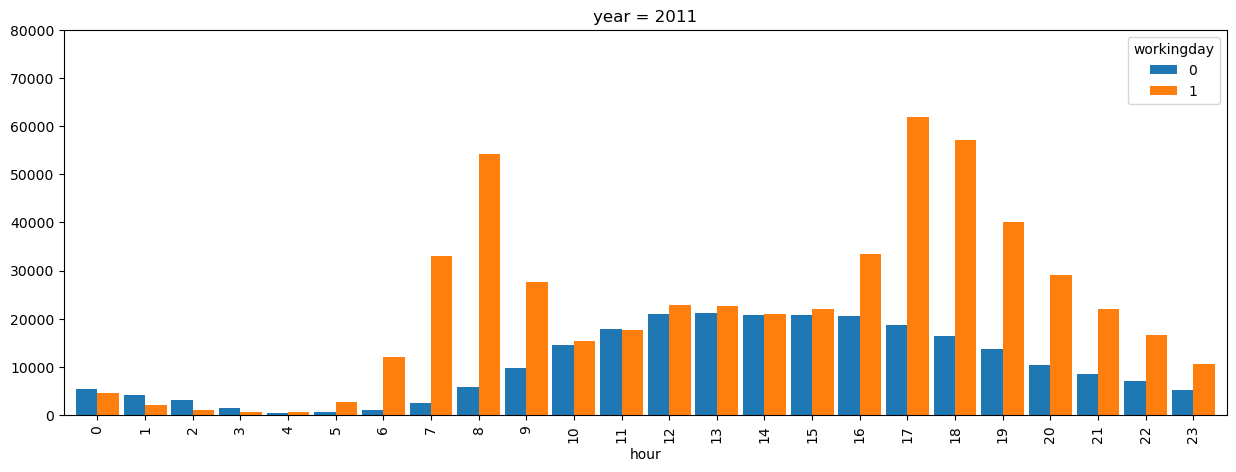

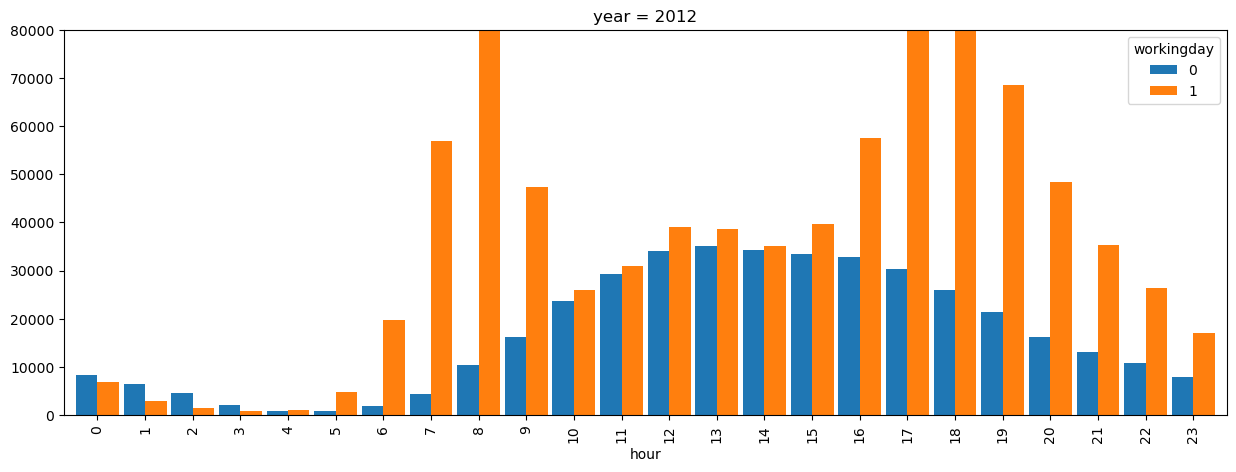

In [49]:
plot_by_year(train,year=2011)
plot_by_year(train,year=2012)

In [50]:
def plot_by_year(agg_attr,title):
    dd=train.copy()
    dd['year']=train.datetime.dt.year
    dd['month']=train.datetime.dt.month
    dd['hour']=train.datetime.dt.hour
    by_year=dd.groupby([agg_attr,'year'])['count'].agg('sum').unstack()
    return by_year .plot(kind='bar', figsize=(15,5), width=0.9, title=title) 

<Axes: title={'center': 'Rent bikes per hour in 2011 and 2012'}, xlabel='hour'>

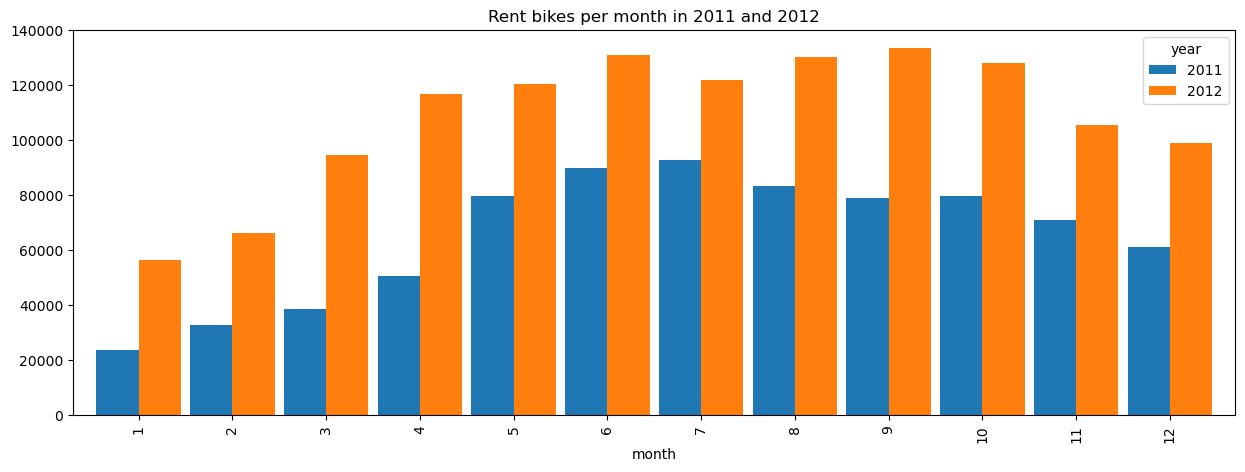

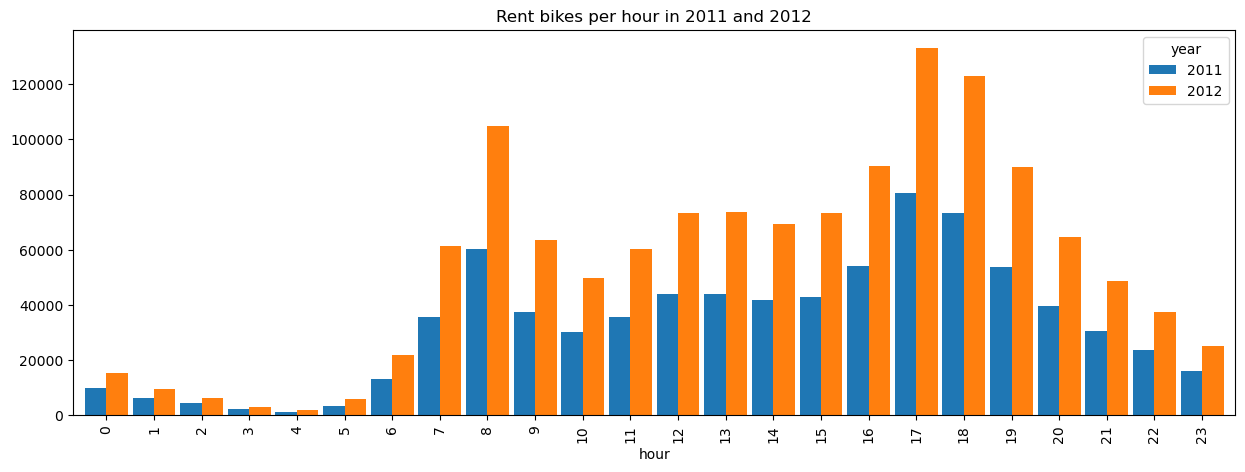

In [51]:
plot_by_year('month', "Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year('hour', "Rent bikes per hour in 2011 and 2012")

In [53]:
def plot_hour(data,message=''):
    dd=data.copy()
    dd['hour']=data.datetime.dt.hour
    hours={}
    for hour in range(24):
        hours[hour]=dd[dd.hour == hour]['count'].values
        return hours[hour]

In [54]:
plot_hour( train[train.datetime.dt.year == 2011], 'year 2011') # box plot for hourly count for the mentioned year
# plot_hours( train[train.datetime.dt.year == 2012], 'year 2012')

array([ 16,  17,   5,   5,   6,  11,  17,  25,  25,   5,  12,   7,   7,
        14,  28,  39,  17,   3,   8,   2,  12,  13,  39,  39,  15,  10,
        17,  16,  14,  30,  39,  11,  19,  15,  17,  32,  29,   7,   8,
        13,  12,  19,  52,   4,  10,   9,   3,   6,  34,  38,  11,  14,
         8,  23,  29,  76,   6,  32,  39,   6,  22,  15,  20,  25,  31,
        53,  23,  24,  15,  21,  27,  43,  33,  39,  25,  96, 177,  16,
        27,  27,  56,  86, 100,  53,  18,  38,  44,  52, 102,  39,  38,
        31,  23,  29,  34,  42,  68,  93, 113,  29,  20,  41,  47,  69,
       117, 119,  28,  31,  52,  47,  24, 104,  89,  68, 115, 144, 140,
        55,  37,  35,  47, 121, 154,  35,  22,  46,  46,  80, 110, 125,
        51,  51,  29,  29,  43,  17,  54, 133,  80,  30,  35,  37,  46,
        65,  84,  90,  25,  31,  24,  56,  62,  51,  64,  87, 109,  97,
         8,  13,  14,  16, 116, 108,  16,  26,  33,  37,  48, 108, 112,
        37, 130,  47,  16,  27,  43,  40,  67,  89, 129,  53,  3

In [55]:
# method to plot a graph for count per hour
def plot_hours(data, message = ''):
    dd = data.copy()
    dd['hour'] = data.datetime.dt.hour # extratcing the hour
    
    hours = {}
    for hour in range(24):
        hours[hour] = dd[ dd.hour == hour ]['count'].values

    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)] )
    
    axis = plt.gca()
    axis.set_ylim([1, 1100])

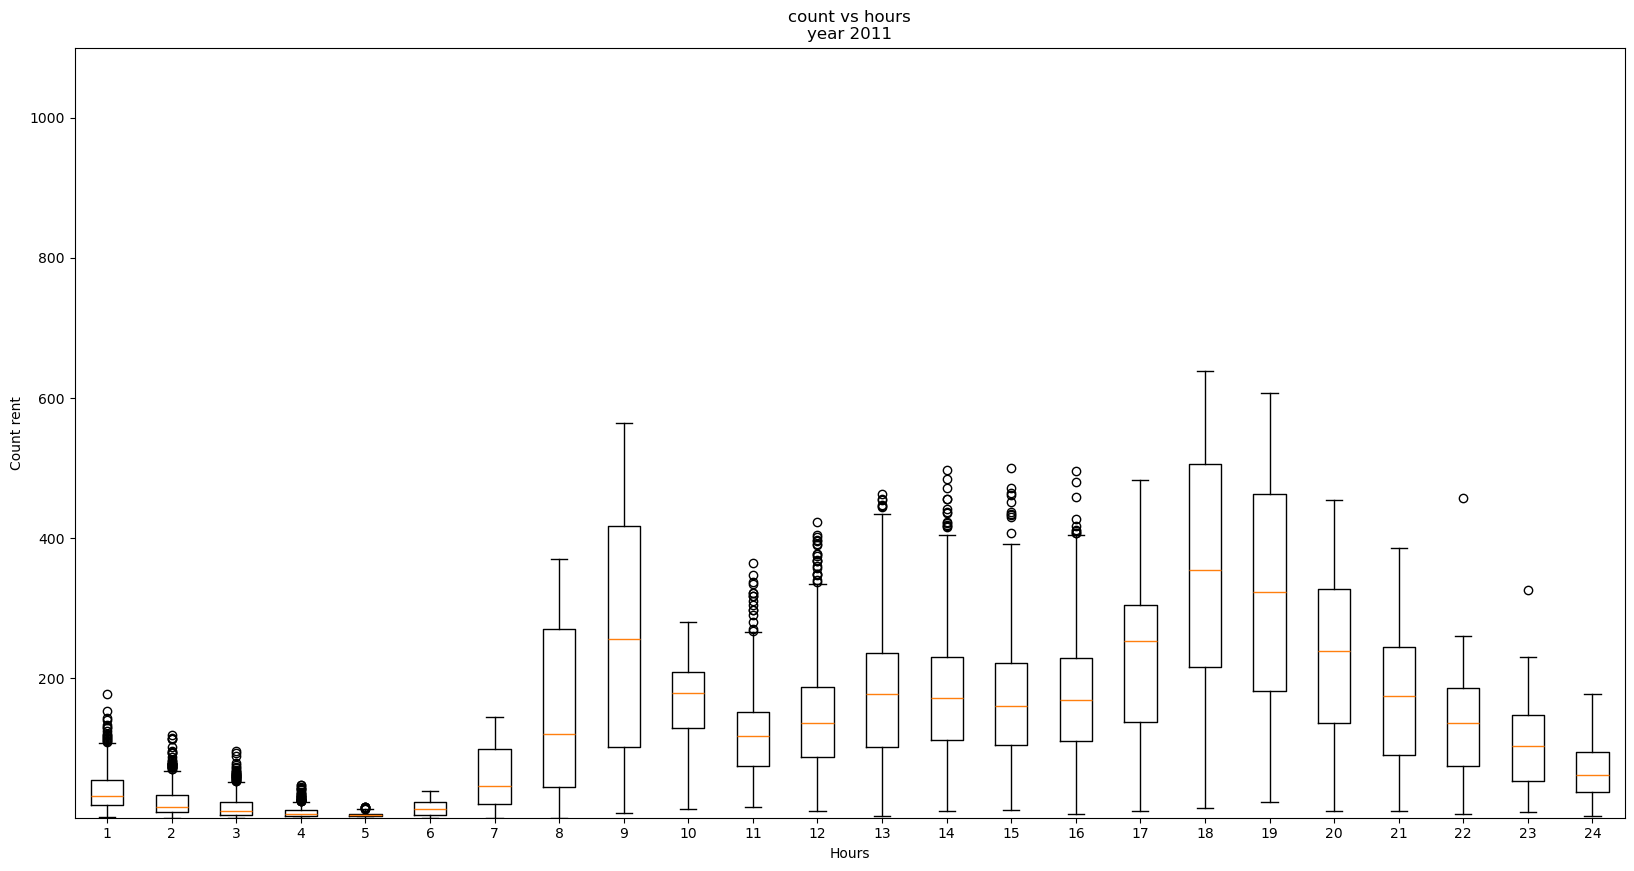

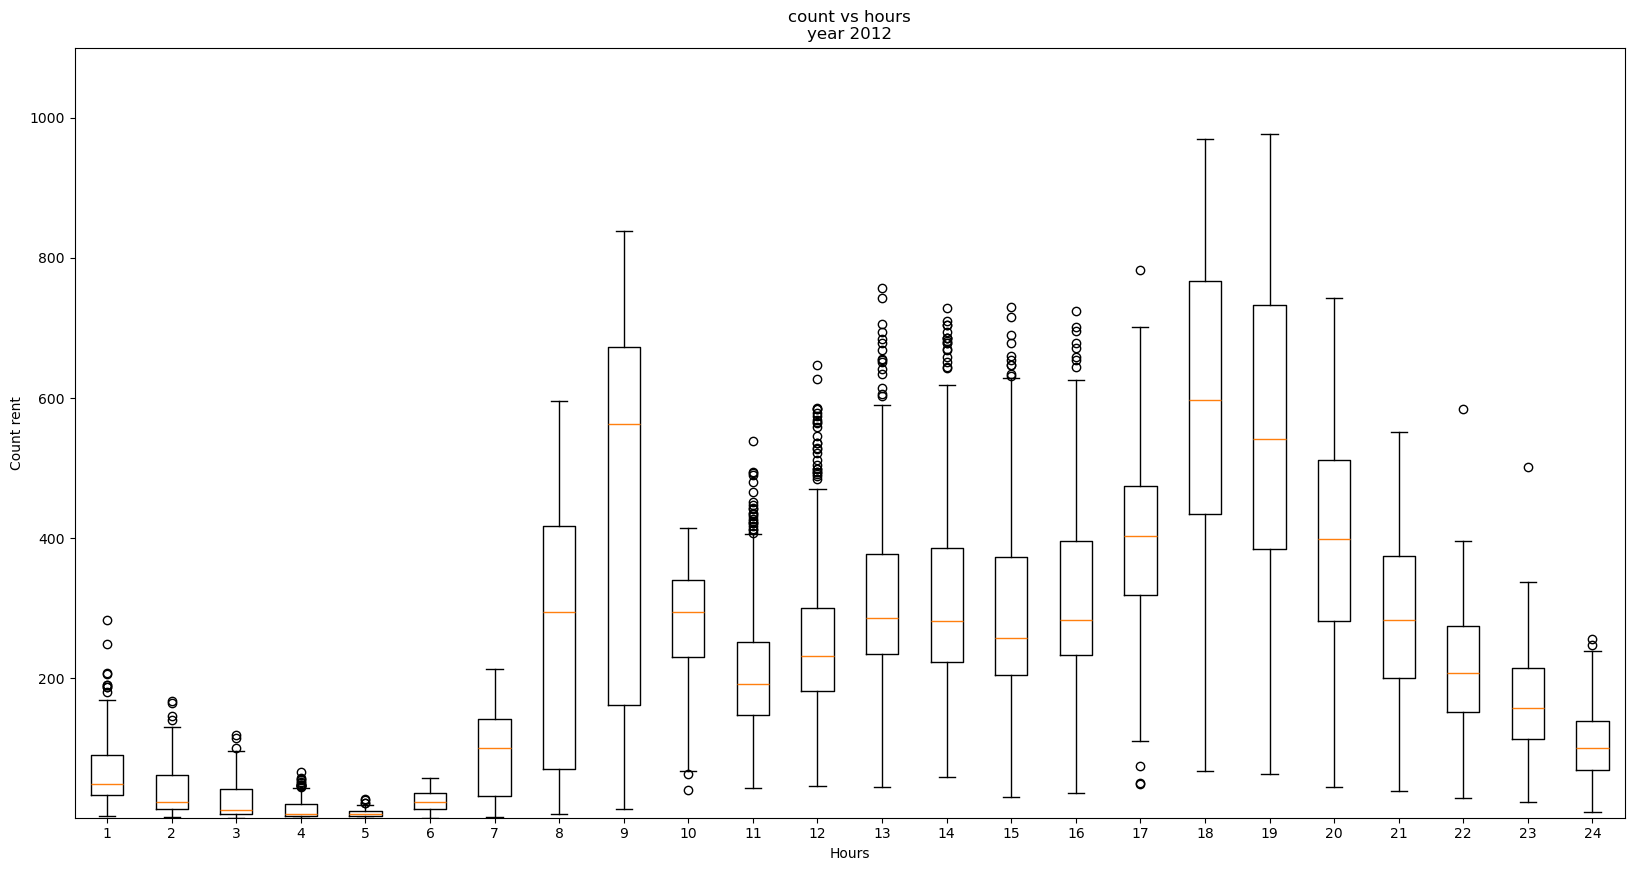

In [56]:
plot_hours( train[train.datetime.dt.year == 2011], 'year 2011') # box plot for hourly count for the mentioned year
plot_hours( train[train.datetime.dt.year == 2012], 'year 2012')

In [68]:
dt=pd.to_datetime(train['datetime'])
train["hour"]=dt.map(lambda x : x.hour)
train.head(3)

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  hour  
0        81        0.0       3          13     16     0  
1        80        0.0       8          32     40     1  
2        80        0.0       5          27     32     2

In [77]:
dt_test = pd.to_datetime(test["datetime"]) # converting the column to datetime for test dataset
test["hour"] = dt_test.map(lambda x: x.hour) # adding the hour column for test dataset
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  hour  
0        56    26.0027     0  
1        56     0.0000     1  
2        56     0.0000     2  
3        56    11.0014     3  
4        56    11.0014     4

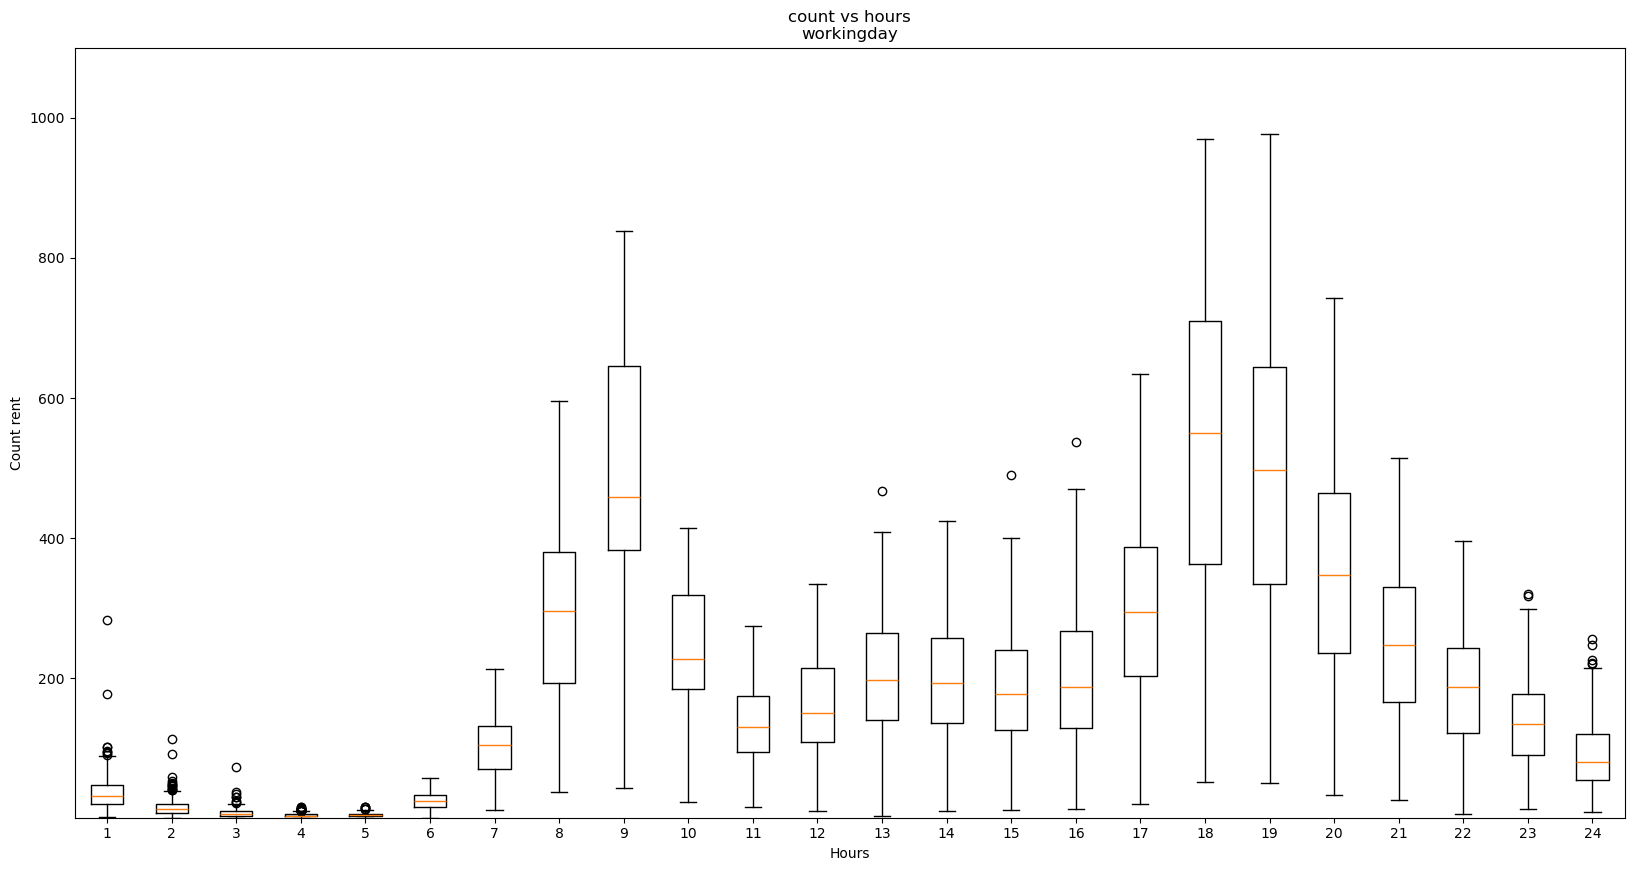

In [79]:
plot_hours(train[train.workingday==1],'workingday')

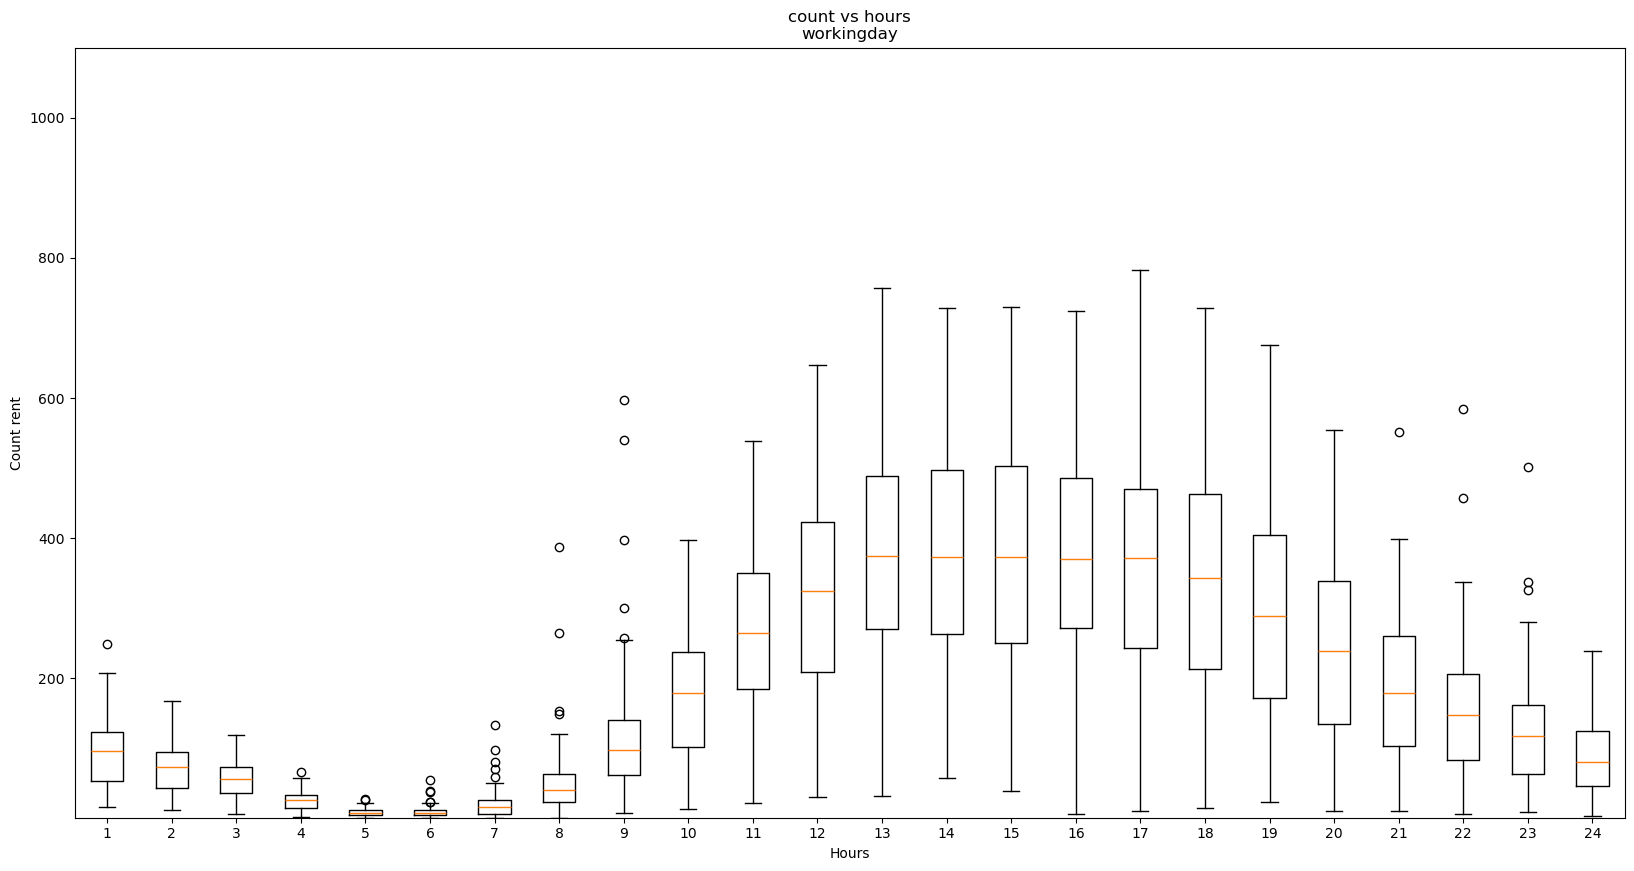

In [81]:
plot_hours(train[train.workingday==0],'workingday')

In [85]:
# method to convert categorical data to numerical data
def categorical_to_numeric(x):
    if 0 <=  x < 6:
        return 0
    elif 6 <= x < 13:
        return 1
    elif 13 <= x < 19:
        return 2
    elif 19 <= x < 24:
        return 3

In [87]:
train['hour']=train['hour'].apply(categorical_to_numeric)

In [89]:
train["hour"].value_counts()

hour
1    3186
2    2736
0    2684
3    2280
Name: count, dtype: int64

In [91]:
train.tail()

datetime  season  holiday  workingday  weather   temp  \
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  hour  
10881  19.695        50    26.0027       7         329    336     3  
10882  17.425        57    15.0013      10         231    241     3  
10883  15.910        61    15.0013       4         164    168     3  
10884  17.425        61     6.0032      12         117    129     3  
10885  16.665        66     8.9981       4          84     88     3

In [93]:
train['hour'].value_counts()

hour
1    3186
2    2736
0    2684
3    2280
Name: count, dtype: int64

In [95]:
train = train.drop(['datetime'], axis=1)
test = test.drop(['datetime'], axis=1)

In [97]:
train.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   casual  registered  count  hour  
0       3          13     16     0  
1       8          32     40     0  
2       5          27     32     0  
3       3          10     13     0  
4       0           1      1     0

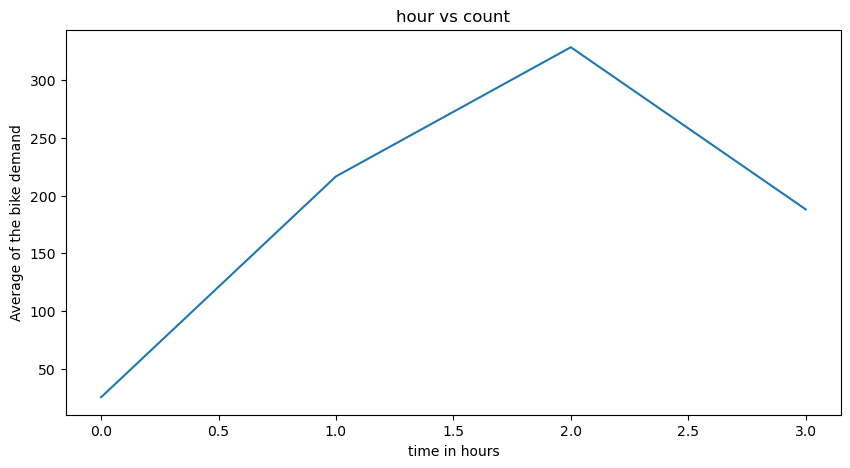

In [99]:
figure,axes=plt.subplots(figsize=(10,5))
hours = train.groupby(["hour"]).agg("mean")["count"]
hours.plot(kind='line', ax=axes)
plt.title("hour vs count")
axes.set_xlabel("time in hours")
axes.set_ylabel("Average of the bike demand")
plt.show()

In [104]:
a=train.groupby('temp')[['count']].mean()
a

count
temp             
0.82    77.714286
1.64    91.500000
2.46    43.000000
3.28    19.272727
4.10    50.272727
4.92    58.416667
5.74    53.233645
6.56    68.109589
7.38    67.754717
8.20    81.995633
9.02    73.616935
9.84    86.442177
10.66   92.560241
11.48  111.066298
12.30  120.002597
13.12  148.547753
13.94  145.053269
14.76  152.957173
15.58  179.682353
16.40  170.217500
17.22  182.609551
18.04  160.878049
18.86  159.692118
19.68  185.058824
20.50  204.672783
21.32  196.480663
22.14  184.717122
22.96  212.392405
23.78  235.650246
24.60  237.182051
25.42  222.062035
26.24  232.403974
27.06  211.025381
27.88  203.433036
28.70  257.679157
29.52  277.691218
30.34  303.193980
31.16  352.801653
31.98  318.683673
32.80  355.623762
33.62  348.323077
34.44  340.225000
35.26  342.934211
36.08  362.869565
36.90  318.717391
37.72  332.176471
38.54  238.857143
39.36  317.833333
41.00  294.000000

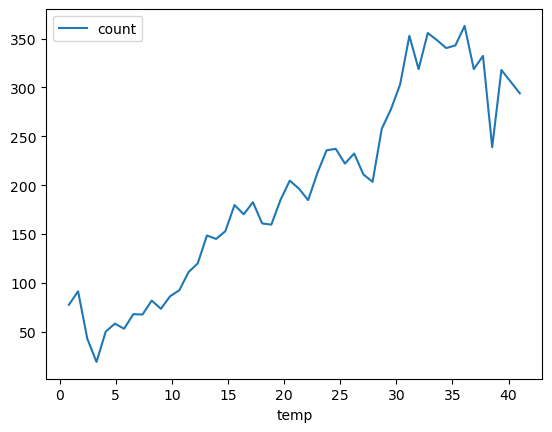

In [106]:
a.plot()
plt.show()

<Axes: xlabel='atemp'>

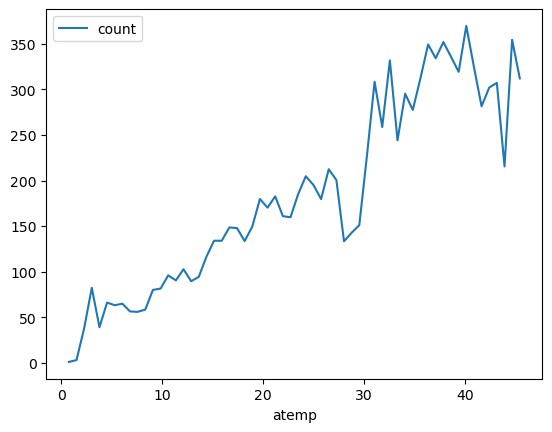

In [110]:
a = train.groupby('atemp')[['count']].mean()
a.plot()

In [ ]:
# count based on holiday
a = train.groupby('holiday')[['count']].mean()
a.plot()

<Axes: xlabel='holiday'>